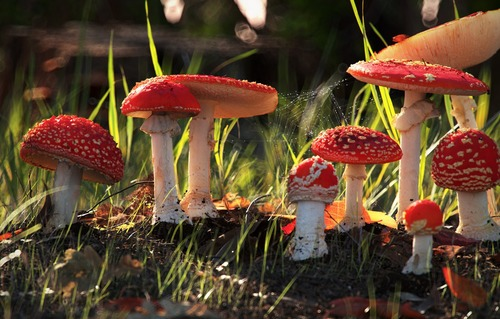

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

1) [Import Libraries](#1) <br>
2) [Load Data](#2) <br>
3) [Data Wrangling](#3) <br>
4) [Exploratory Data Analysis](#4) <br>
5) [Feature Engineering](#5) <br>
6) [Train Model](#6) <br>
7) [Getting Results](#7) <br>

## <a id = "1"><p style="font-family:newtimeroman; font-size:100%; text-align:center">1. Import Libraries</p></a>

In [49]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mushroom-classification/mushrooms.csv


In [68]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manifold and clustering
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Machine Learning
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve, learning_curve, train_test_split

# Others
import warnings

ModuleNotFoundError: No module named 'slearn'

In [51]:
# Parameters
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10, 10)

## <a id = "2"><p style="font-family:newtimeroman; font-size:100%; text-align:center">2. Load Data</p></a>

In [52]:
df = pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [53]:
df.shape

(8124, 23)

## <a id = "3"><p style="font-family:newtimeroman; font-size:100%; text-align:center">3. Data Wrangling</p></a>

In [54]:
nan_percent = df.isna().sum() * 100 / len(df)
nan_percent

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

In [55]:
df_zeros = df.apply(lambda s: s.value_counts().get(0, 0), axis = 1)
print("frequency of zeros in df: {}".format(df_zeros.sum() / (df.shape[0] * df.shape[1])))

frequency of zeros in df: 0.17505833493888212


## <a id = "4"><p style="font-family:newtimeroman; font-size:100%; text-align:center">4. Exploratory Data Analysis (EDA)</p></a>

Attribute Information:

1. **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s
3. **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. **bruises**: bruises=t,no=f
5. **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. **gill-attachment**: attached=a,descending=d,free=f,notched=n
7. **gill-spacing**: close=c,crowded=w,distant=d
8. **gill-size**: broad=b,narrow=n
9. **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. **stalk-shape**: enlarging=e,tapering=t
11. **stalk-root**: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s
13. **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s
14. **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. **veil-type**: partial=p,universal=u
17. **veil-color**: brown=n,orange=o,white=w,yellow=y
18. **ring-number**: none=n,one=o,two=t
19. **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. **population**: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. **habitat**: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

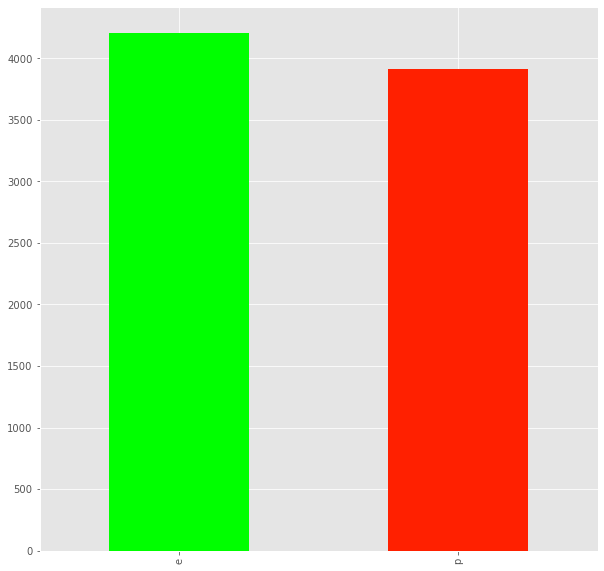

In [57]:
df["class"].value_counts().plot.bar(color = ["#00ff00", "#ff2000"]);

In [58]:
df["class"].value_counts() * 100 / len(df)

e    51.797144
p    48.202856
Name: class, dtype: float64

## <a id = "5"><p style="font-family:newtimeroman; font-size:100%; text-align:center">5. Feature engineering</p></a>

In [60]:
X = df.iloc[:, df.columns != "class"]
y = df.loc[: , ["class"]]

LabelEn = LabelEncoder()
y = LabelEn.fit_transform(y)

OneHot = OneHotEncoder()
X = OneHot.fit_transform(X)

In [61]:
X = pd.DataFrame(X.toarray(), columns = OneHot.get_feature_names())
y = pd.DataFrame(y, columns = ["class"])

In [64]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.66, shuffle = True, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5361, 117), (2763, 117), (5361, 1), (2763, 1))